### Chapter 16: CNN

In [31]:
from tensorflow.keras.datasets import mnist

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))
print(X_train.shape, X_test.shape)

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개
(60000, 28, 28) (10000, 28, 28)


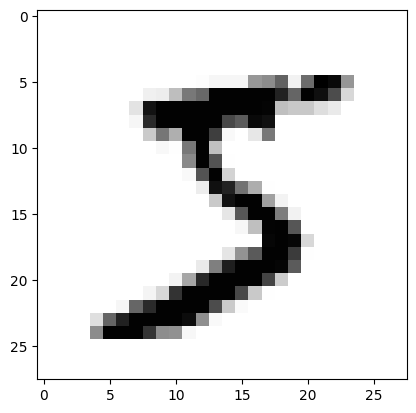

In [34]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [35]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" %i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [36]:
for x in X_train[0]:
    for i in x:
        print(f"{i:3d}", end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [37]:
#데이터의 차원을 변경

X_train = X_train.reshape(X_train.shape[0], 28*28) #X_train.shape[0] -> 행의개수를 기준으로 reshape
print(X_train.shape) #(60000 * 784)

X_test = X_test.reshape(X_test.shape[0], 28*28)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [38]:
#데이터 정규화
X_train = X_train.astype('float64')/255
X_test = X_test.astype('float64')/255

In [39]:
print("class : %d" %(y_train[0]))

print(y_train[:10]) # 카테고리 데이터로 변경 필요
from tensorflow.keras.utils import to_categorical # one-hot encoding과 같은 결과 반환

y_train = to_categorical(y_train, 10)
y_train[:10]
y_test = to_categorical(y_test, 10)
y_test[:10]

class : 5
[5 0 4 1 9 2 1 3 1 4]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [42]:
#딥러닝 모델 실행
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Dense(512, input_dim = 28*28, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

#모델 최적화를 위한 설정
model_path = './data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = model_path, monitor = 'val_loss',
                               verbose = 1, save_best_only =True)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

hist = model.fit(X_train, y_train, epochs = 2000,
                 validation_split = 0.25, batch_size = 200, verbose = 0,
                 callbacks = [early_stopping, checkpointer])

#테스트 정확도 출력
print("Test accuracy :", model.evaluate(X_test, y_test)[1])


Epoch 1: val_loss improved from inf to 0.18829, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18829 to 0.13783, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13783 to 0.11580, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11580 to 0.09736, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09736 to 0.09529, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09529 to 0.08511, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08511

Epoch 8: val_loss improved from 0.08511 to 0.08114, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08114

Epoch 10: val_loss improved from 0.08114 to 0.07916, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.07916

Epoch 12: val_loss did not improve from 0.07916

Epoch 13: val_loss did not impro

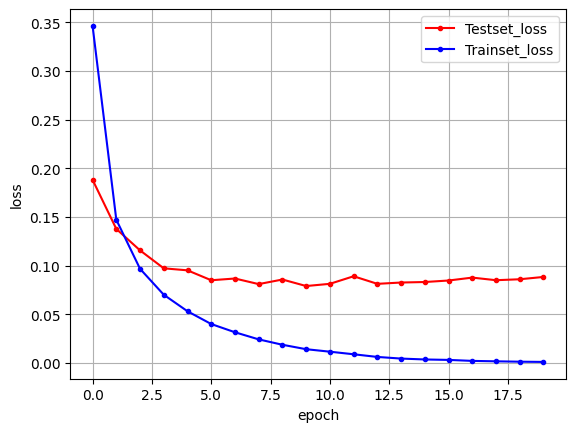

In [44]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = hist.history['val_loss']

#학습셋의 오차
y_loss = hist.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()